In [9]:
# Import libraries
import warnings
import itertools

import mod as mod
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sm as sm
import statsmodels.api as sm

# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')


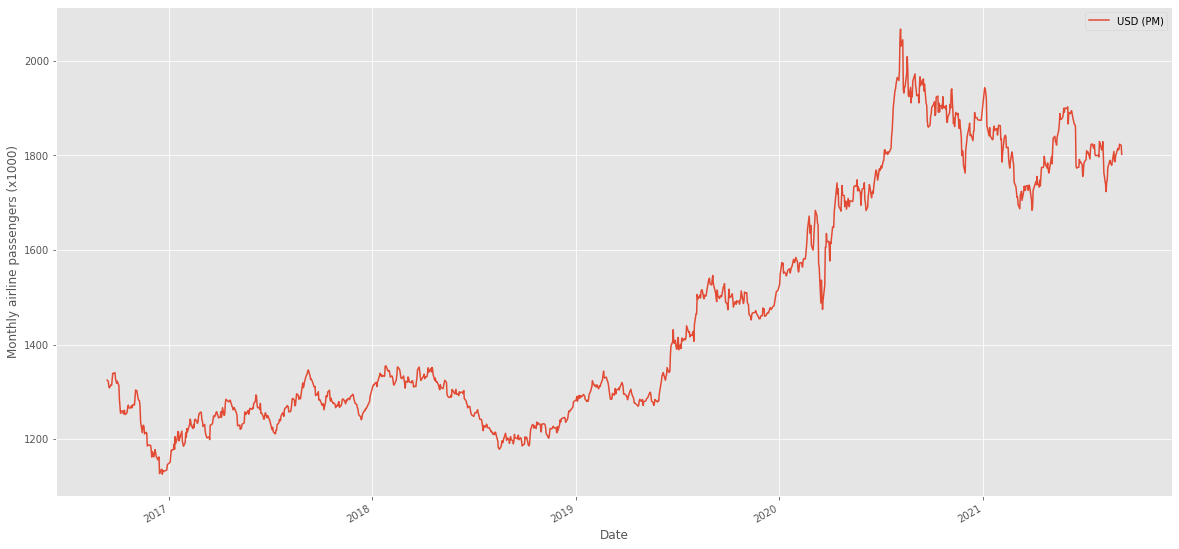

In [2]:
# Load the data
data = pd.read_csv('./data/gold_data.csv', engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
data['Date']=pd.to_datetime(data['Date'])
data.set_index(['Date'], inplace=True)

# Plot the data
data.plot()
plt.ylabel('Daily Prices')
plt.xlabel('Date')
plt.show()


In [3]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [4]:
data

,USD (PM)
Date,
2016-09-12,1324.60
2016-09-13,1323.65
2016-09-14,1321.75
2016-09-15,1310.80
2016-09-16,1308.35
...,...
2021-09-01,1811.80
2021-09-02,1812.55
2021-09-03,1823.70


In [5]:
train_data = data['1949-01-01':'2020-09-10']
test_data = data['2020-09-11':'2021-09-07']

In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(disp=-1)

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue


In [8]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARI


SyntaxError: unexpected EOF while parsing (339881101.py, line 2)

In [11]:
import statsmodels.api as sm

In [12]:
# Let's fit this model
mod = sm.tsa.statespace.SARIMAX(train_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit(disp=-1)

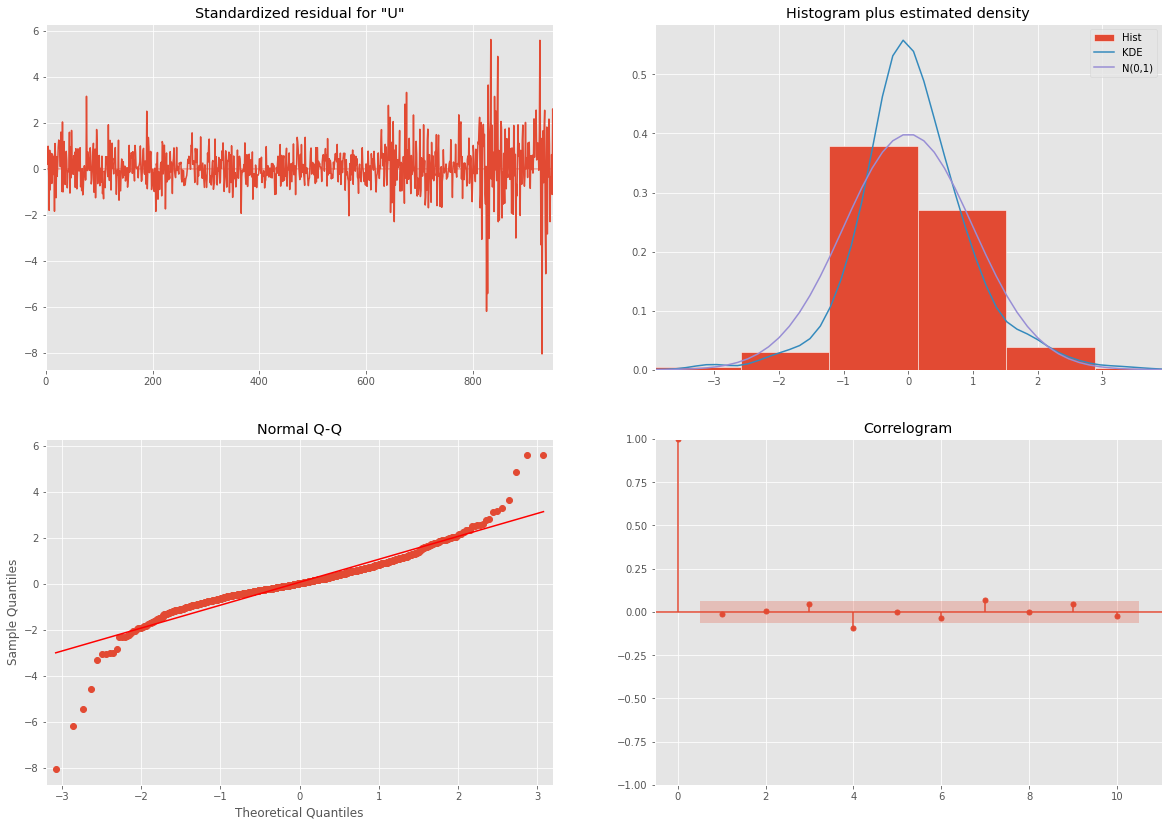

In [13]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()

In [14]:
results
pred0 = results.get_prediction(start='2020-09-11', dynamic=False)
pred0_ci = pred0.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [15]:
pred1 = results.get_prediction(start='2020-09-11', dynamic=True)
pred1_ci = pred1.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [16]:
pred2 = results.get_forecast('2020-09-11')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2020-09-11':'2021-09-07'])

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

NameError: name 'pred0' is not defined

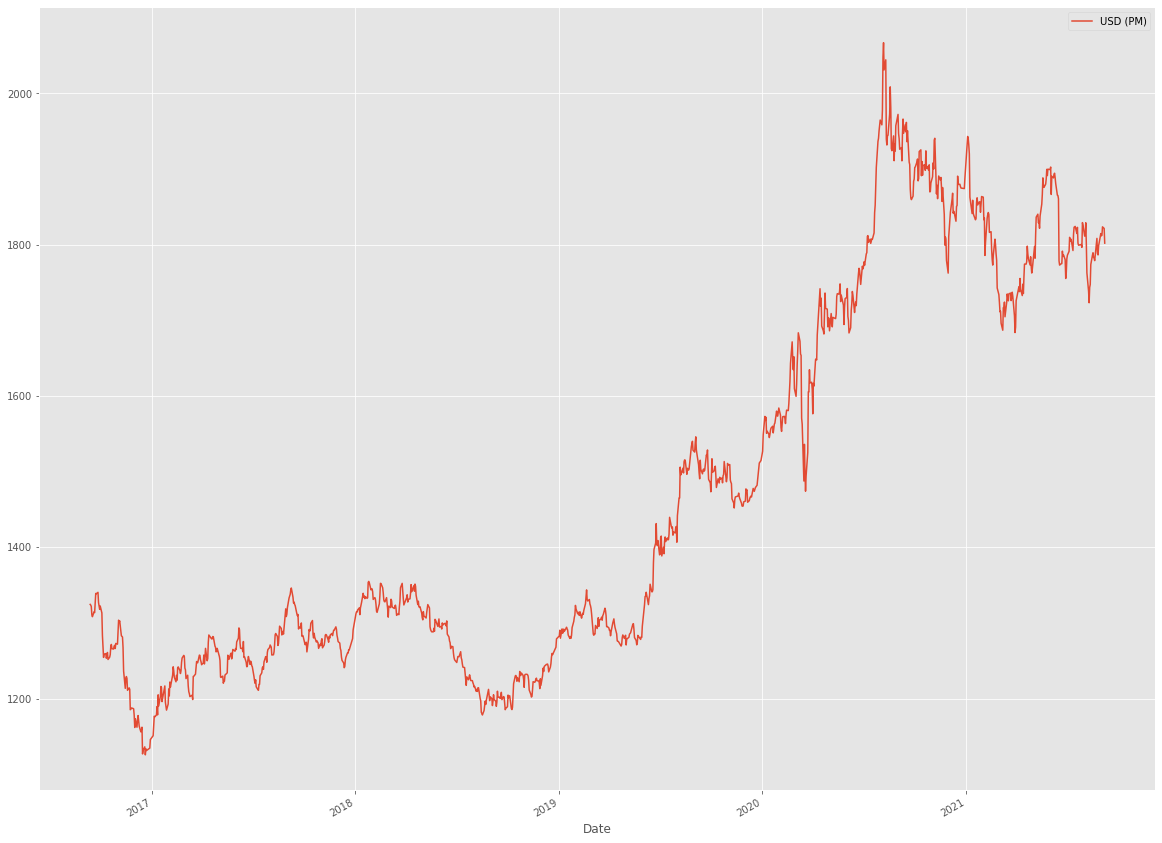

In [19]:
ax = data.plot(figsize=(20, 16))
pred0.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast (get_predictions, dynamic=False)')
pred1.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_predictions, dynamic=True)')
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast (get_forecast)')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='k', alpha=.1)
plt.ylabel('Monthly airline passengers (x1000)')
plt.xlabel('Date')
plt.legend()
plt.show()

In [20]:
prediction = pred2.predicted_mean['2020-09-11':'2021-09-07'].values
# flatten nested list
truth = list(itertools.chain.from_iterable(test_data.values))
# Mean Absolute Percentage Error
MAPE = np.mean(np.abs((truth - prediction) / truth)) * 100

print('The Mean Absolute Percentage Error for the forecast of year 1960 is {:.2f}%'.format(MAPE))


NameError: name 'pred2' is not defined